In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [3]:
X = mnist["data"]

print(X.shape)
X

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y = mnist["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [5]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y_hot.shape)
y_hot

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(1797, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Activate Functions

### Sigmoid

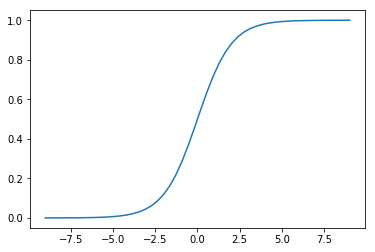

In [10]:
# Write your code here!
def sigmoid(n):
    return (1/(1+np.exp(-n)))

xx= np.linspace(start=-9,stop=+9)
yy = sigmoid(xx)
plt.plot(xx,yy)

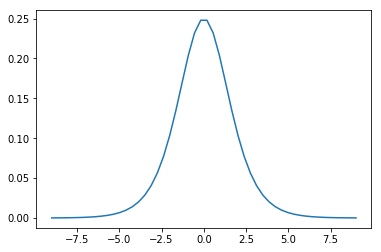

In [13]:
def sigmoid_derivative(n):
    return sigmoid(n)*(1-sigmoid(n))

xx= np.linspace(start=-9,stop=+9)
yy = sigmoid_derivative(xx)
plt.plot(xx,yy)

### ReLU

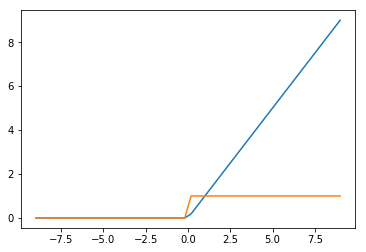

In [30]:
# Write your code here!
def ReLU(x):
    return x *(x>0)
xx = np.linspace(start=-9,stop=9)
yy = ReLU(xx)
plt.plot(xx,yy)

def ReLU_dev(x):
    return (x>0)
yy = ReLU_dev(xx)
plt.plot(xx,yy)

## Train

In [21]:
import time

def train(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative):
    num_input = X.shape[1]
    num_output = y_hot.shape[1]

    w1 = np.random.uniform(low=-np.sqrt(6 / (num_input + 100)), high=np.sqrt(6 / (num_input + 100)), size=(num_input, 100))
    w2 = np.random.uniform(low=-np.sqrt(6 / (100 + 100)), high=np.sqrt(6 / (100 + 100)), size=(100, 100))
    w3 = np.random.uniform(low=-np.sqrt(6 / (100 + num_output)), high=np.sqrt(6 / (100 + 10)), size=(100, num_output))

    history = []

    start = time.time()

    for epoch in range(num_epoch):
        z1 = X.dot(w1)
        a1 = activation(z1)
        z2 = a1.dot(w2)
        a2 = activation(z2)
        z3 = a2.dot(w3)
        a3 = sigmoid(z3)

        y_predict = np.argmax(a3, axis=1)    
        error = (y != y_predict).mean()

        if epoch % 10 == 0:
            print("{0:2} error = {1:.5f}".format(epoch, error))

        end = time.time()
        history.append({
            'time': end - start,
            'error': error
        })

        d3 = a3 - y_hot
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w3 = w3 - learning_rate * a2.T.dot(d3)
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

    end = time.time()
    elapsed = end - start

    return history, error, elapsed

In [22]:
%time tmp = [sigmoid(i) for i in range(1000000)]
%time tmp = [sigmoid_derivative(i) for i in range(1000000)]


Wall time: 5.02 s
Wall time: 10.4 s


In [23]:
%time tmp = [ReLU(i) for i in range(1000000)]
%time tmp = [ReLU_dev(i) for i in range(1000000)]

Wall time: 532 ms
Wall time: 409 ms


### Sigmoid

In [33]:
# Write your code here!
num_epoch = 100
learning_rate = 0.0003
activation = sigmoid
activation_derivative = sigmoid_derivative
sigmoid_history,error,elapse = train(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative)

print("Elapsed = {0:.2f} seconds, error={1:.2f}".format(elapse,error))

 0 error = 0.89983
10 error = 0.27657
20 error = 0.24708
30 error = 0.21369
40 error = 0.19366
50 error = 0.15971
60 error = 0.15526
70 error = 0.14580
80 error = 0.14190
90 error = 0.13244
Elapsed = 8.08 seconds, error=0.12


### ReLU

In [36]:
# Write your code here!
num_epoch = 100
learning_rate = 0.00001
activation = ReLU
activation_derivative = ReLU_dev
ReLU_history,error,elapse = train(X, y, y_hot, num_epoch, learning_rate, activation, activation_derivative)
print("Elapsed = {0:.2f} seconds, error={1:.2f}".format(elapse,error))

 0 error = 0.90317
10 error = 0.22426
20 error = 0.11964
30 error = 0.07958
40 error = 0.06400
50 error = 0.05398
60 error = 0.04786
70 error = 0.04174
80 error = 0.03506
90 error = 0.03228
Elapsed = 2.57 seconds, error=0.03


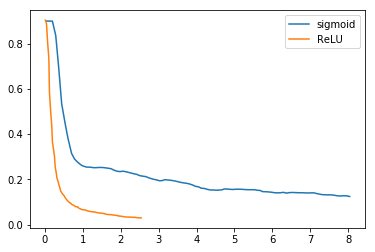

In [38]:
import pandas as pd
sg = pd.DataFrame(sigmoid_history)
re = pd.DataFrame(ReLU_history)
plt.plot(sg['time'],sg['error'],label='sigmoid')
plt.plot(re['time'],re['error'],label='ReLU')
plt.legend()